# Basic EDA and Vizualizations
Exploring the time-series, trying to find seasonality, relation with other factors, KPIs

In [160]:
# Cell 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Set aesthetic parameters for seaborn
sns.set(style="whitegrid")


In [162]:
df = pd.read_csv("../data/processed/cleaned.csv")
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.head()

,Unnamed: 0,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday_y
0,0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106,False
1,1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,211.242170,8.106,True
2,2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,211.289143,8.106,False
3,3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,211.319643,8.106,False
4,4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,211.350143,8.106,False


In [164]:
# Cell 3: Basic overview
print("Shape of the dataset:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)

import pandas as pd
import os

# Define paths to all data files
data_paths = {
    "features": "../data/raw/features.csv",
    "sales": "../data/raw/sales.csv",
    "stores": "../data/raw/stores.csv",
    "cleaned": "../data/processed/cleaned.csv"
}

# Function to check date consistency
def check_date_column(df, name):
    if 'Date' not in df.columns:
        print(f"🔴 '{name}' has no 'Date' column.\n")
        return

    # Convert to datetime if not already
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

    # Check for missing or invalid dates
    
    missing_dates = df['Date'].isnull().sum()
    min_date = df['Date'].min()
    max_date = df['Date'].max()
    unique_dates = df['Date'].nunique()

    print(f"📁 {name}")
    print(f"  ✅ Date type: {df['Date'].dtype}")
    print(f"  📆 Date range: {min_date.date()} → {max_date.date()}")
    print(f"  🔢 Unique dates: {unique_dates}")
    print(f"  ❌ Invalid/missing dates: {missing_dates}\n")

# Run the check on all datasets
for name, path in data_paths.items():
    if os.path.exists(path):
        df = pd.read_csv(path)
        check_date_column(df, name)
    else:
        print(f"⚠️ File not found: {path}")

Shape of the dataset: (421570, 13)

Missing values:
 Unnamed: 0      0
Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday_x     0
Type            0
Size            0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
IsHoliday_y     0
dtype: int64

Data types:
 Unnamed: 0               int64
Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday_x               bool
Type                    object
Size                     int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
IsHoliday_y               bool
dtype: object
📁 features
  ✅ Date type: datetime64[ns]
  📆 Date range: 2010-01-10 → 2013-12-07
  🔢 Unique dates: 73
  ❌ Invalid/missing dates: 4905

📁 sales
  ✅ Date type: datetime64[ns]
  📆 Date range: 2010-01-10 → 2012-12-10
  🔢 Unique dates: 57
  ❌ Invalid/missing dates: 253414



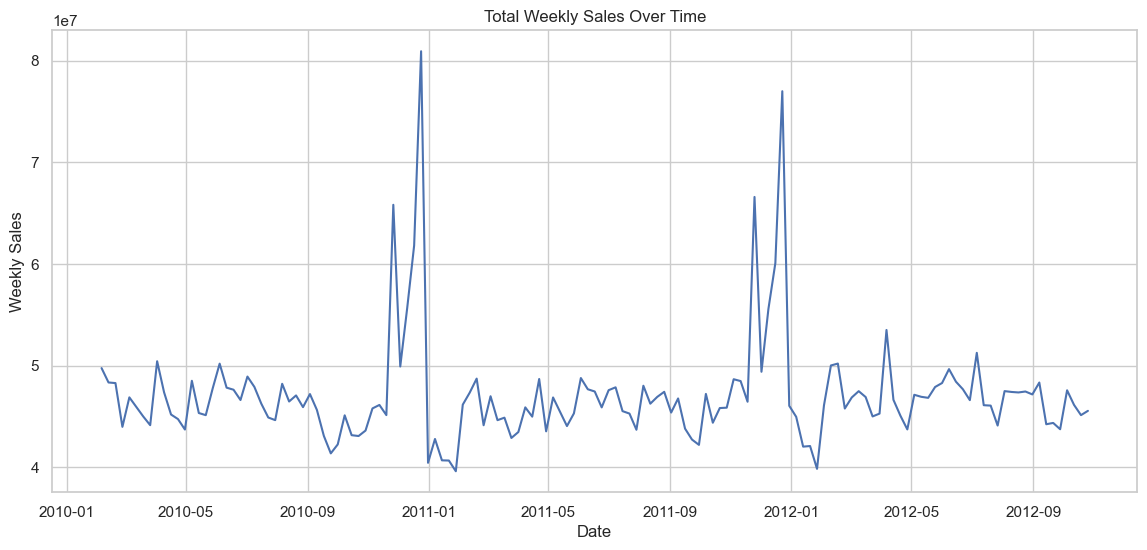

In [166]:
# Cell 5: Sales over time
sales_over_time = df.groupby('Date')['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(14, 6))
sns.lineplot(data=sales_over_time, x='Date', y='Weekly_Sales')
plt.title("Total Weekly Sales Over Time")
plt.ylabel("Weekly Sales")
plt.xlabel("Date")
plt.show()

So, we can see seasonal data here, everytime at about december, the sales spikes and falls drastically in jan again, lets try to find what the data is trying to say when we separate sales with store types

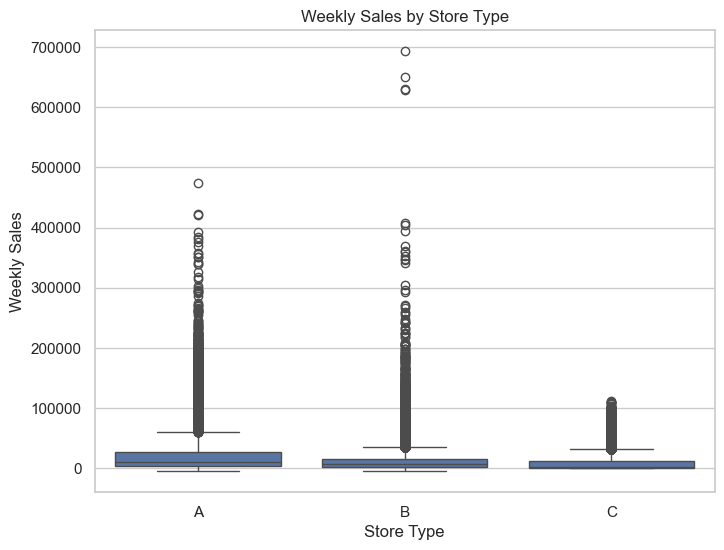

In [106]:
# Cell 6: Sales by Store Type
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Type', y='Weekly_Sales')
plt.title("Weekly Sales by Store Type")
plt.xlabel("Store Type")
plt.ylabel("Weekly Sales")
plt.show()

Type A: The data ranges from 0 to 400000 and there are otliers around 500000
Type B: The data ranges from 0 to 400000 and there are otliers around 600000 to 700000
Type C: The data ranges from 0 to 120000 and there are no otliers

Lets plot the sales of each store

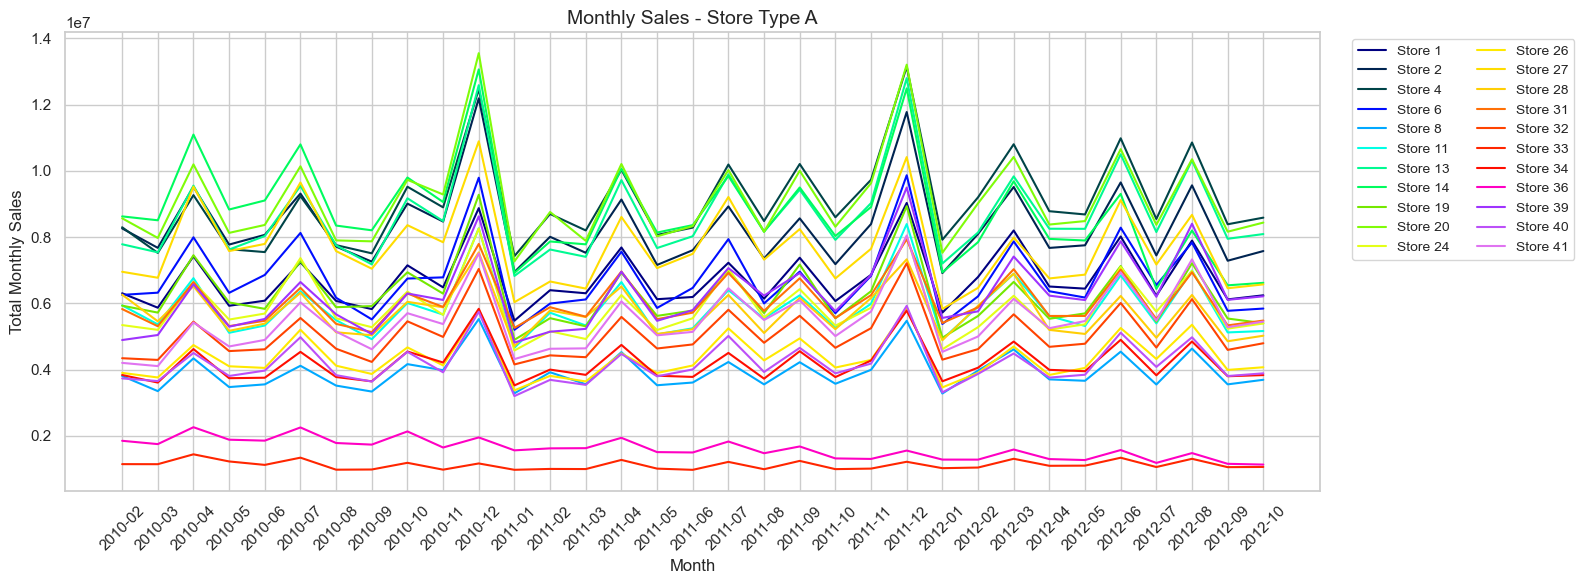

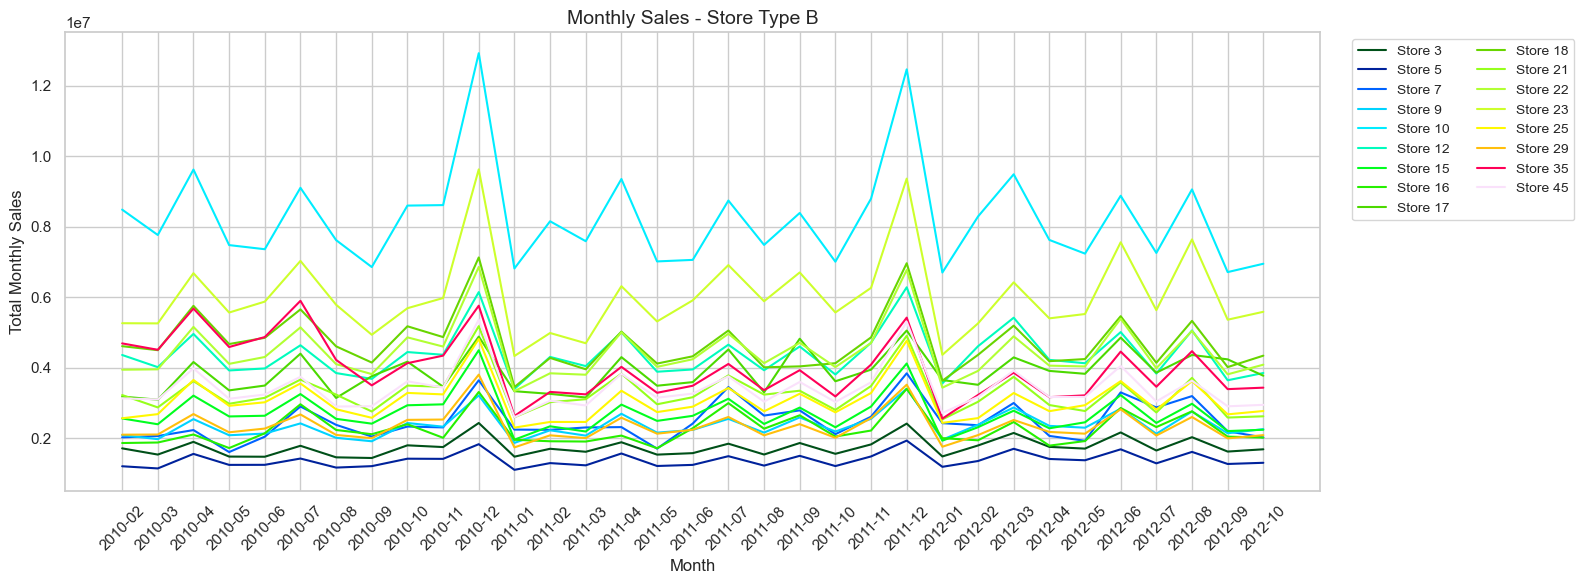

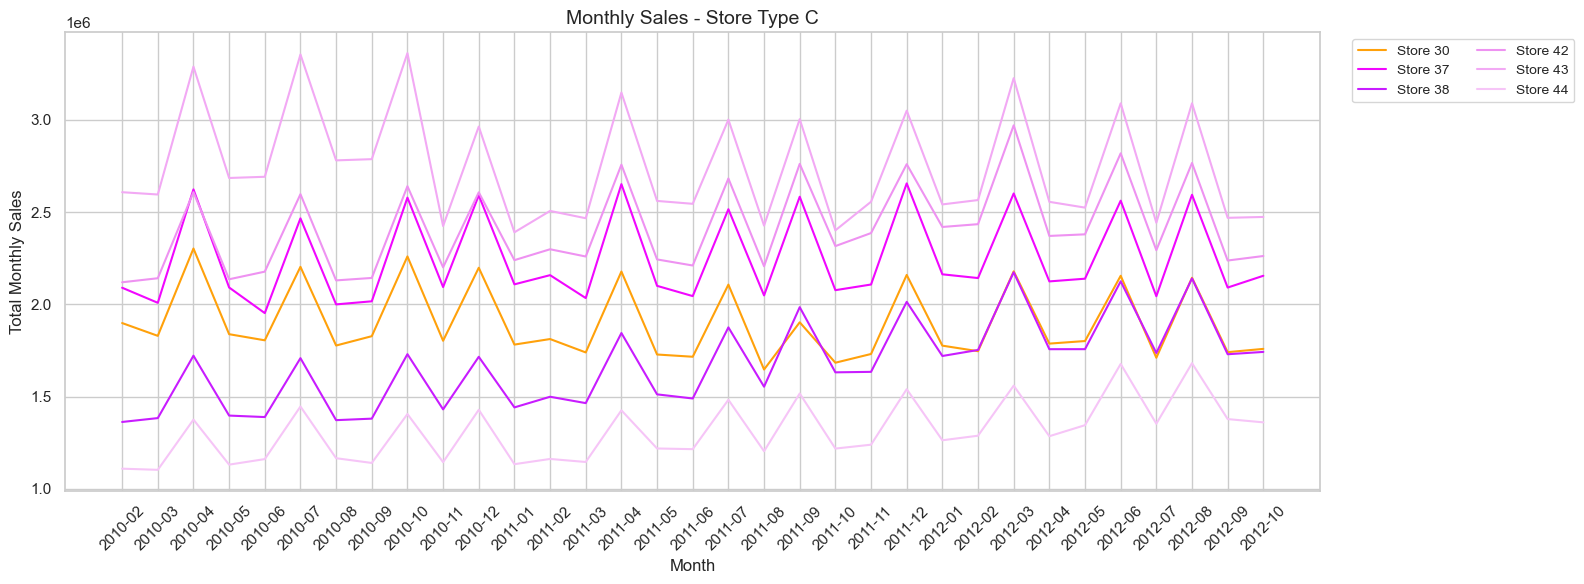

In [142]:
# Prepare the data
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby(['Store', 'Month', 'Type'])['Weekly_Sales'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].astype(str)

# Generate 45 unique colors for up to 45 stores
cmap = plt.colormaps.get_cmap('gist_ncar')
colors = [cmap(i / 45) for i in range(45)]

store_ids = sorted(monthly_sales['Store'].unique())
store_color_map = {store: colors[i] for i, store in enumerate(store_ids)}

# Separate plots for each store type
for store_type in ['A', 'B', 'C']:
    type_data = monthly_sales[monthly_sales['Type'] == store_type]
    type_store_ids = type_data['Store'].unique()

    plt.figure(figsize=(16, 6))
    for store in type_store_ids:
        store_data = type_data[type_data['Store'] == store]
        plt.plot(store_data['Month'], store_data['Weekly_Sales'],
                 label=f'Store {store}',
                 color=store_color_map[store],
                 linestyle='-')  # same style within type

    plt.title(f"Monthly Sales - Store Type {store_type}", fontsize=14)
    plt.xlabel("Month")
    plt.ylabel("Total Monthly Sales")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', ncol=2, fontsize='small')
    plt.tight_layout()
    plt.show()

As seen in the above graph, Type A and B has its peak times at December, and falls drastically at January.
But when we look at the graphs of Store Type C, we see the graph is stable and just jiggling around inside a price range.
That is why in the previous boxplot, we see no outliwes in Store Type C.

What does this mean?
- Store Type A and B sells items that are more purchased on december (its seasonal). Eg: Holiday trip tickets, Gifts, Winter Clothing, Heaters, etc
- Store Type C sells items that are regularly bought. Eg: Groceries, Subscriptions, Petrol, Stationaries, etc

Lets check why does december has high sales

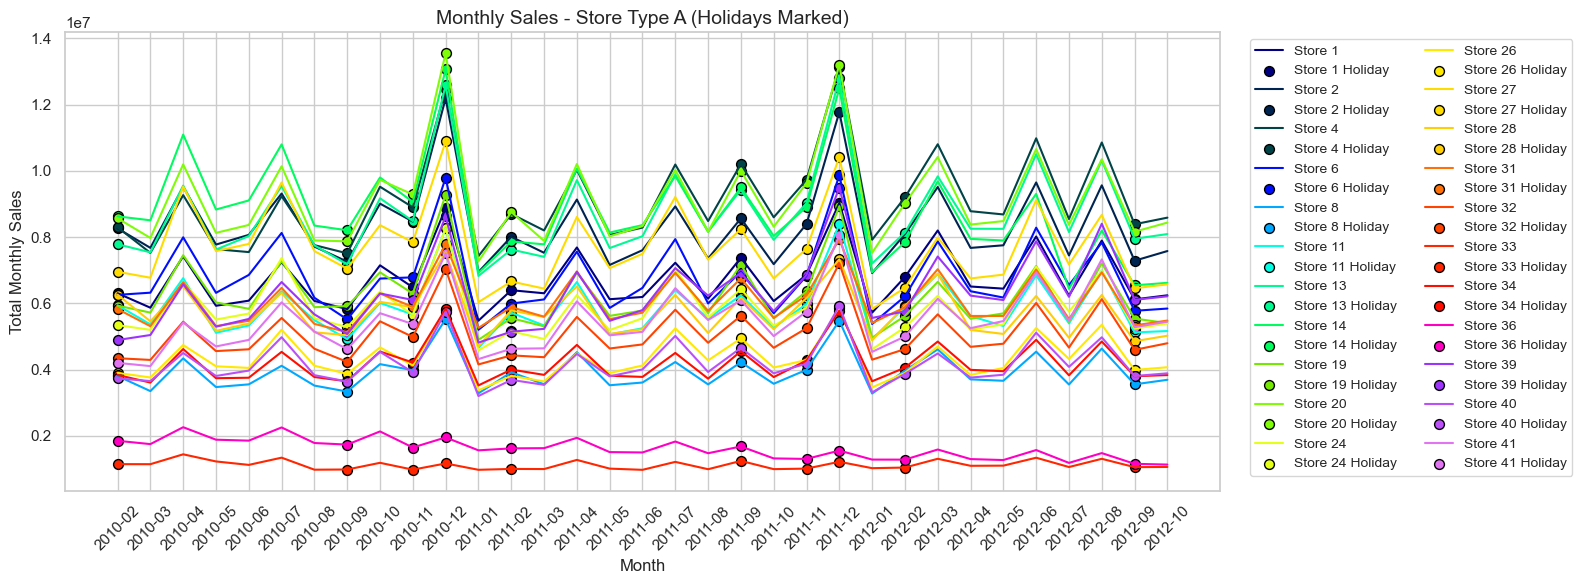

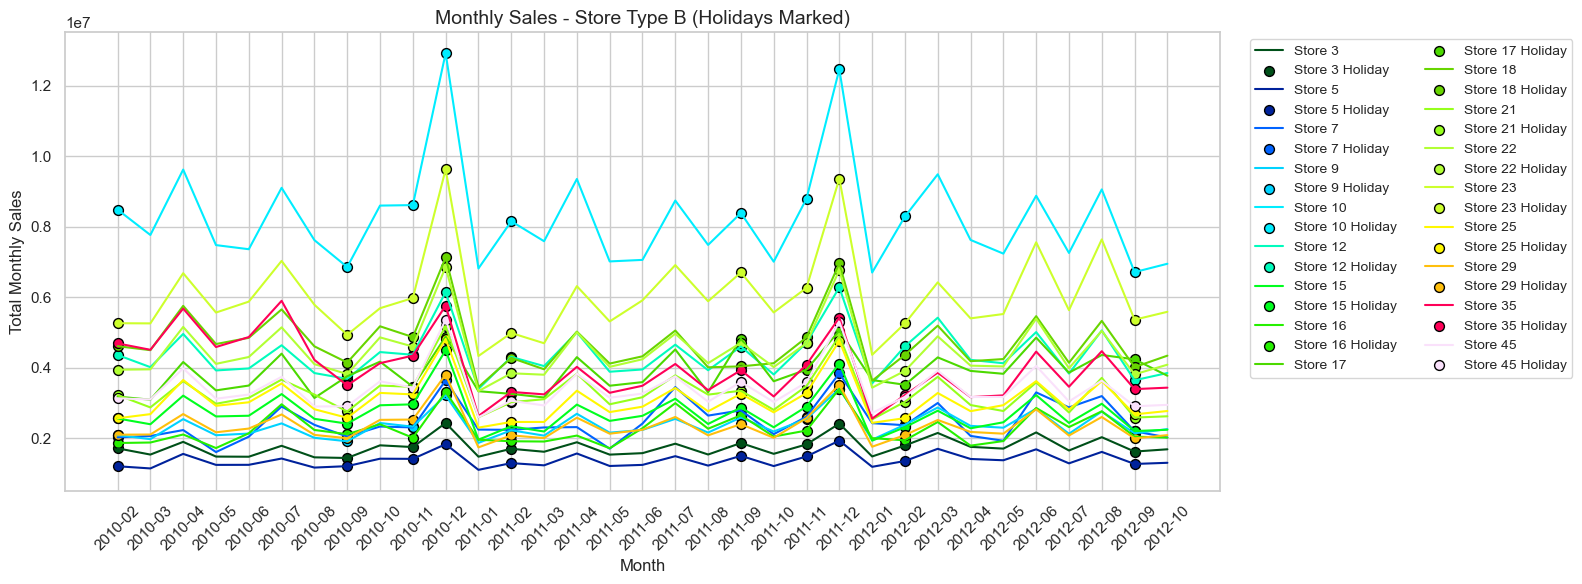

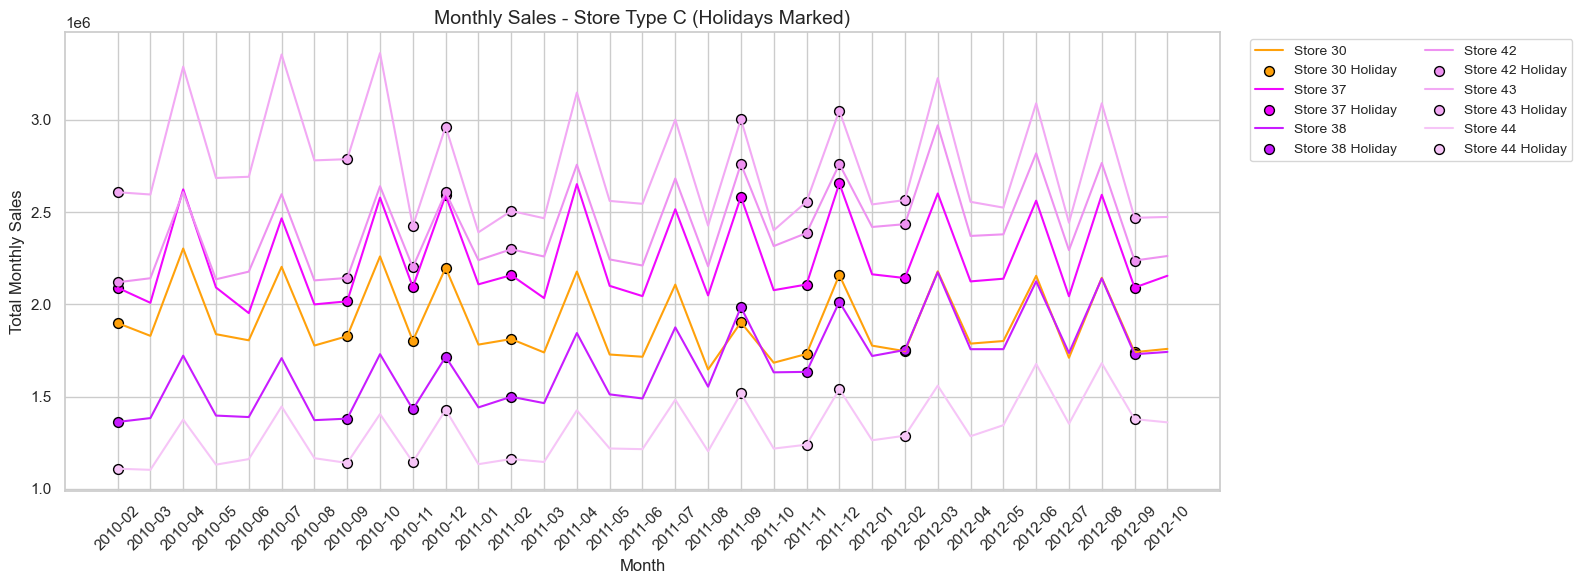

In [145]:
# Identify holidays
holidays = df[df['IsHoliday_x'] == True]

# Convert to monthly to align with the x-axis in the plots
holidays['Month'] = holidays['Date'].dt.to_period('M').astype(str)

# Plot for each store type
for store_type in ['A', 'B', 'C']:
    type_data = monthly_sales[monthly_sales['Type'] == store_type]
    type_store_ids = type_data['Store'].unique()

    plt.figure(figsize=(16, 6))
    for store in type_store_ids:
        store_data = type_data[type_data['Store'] == store]
        plt.plot(store_data['Month'], store_data['Weekly_Sales'],
                 label=f'Store {store}',
                 color=store_color_map[store],
                 linestyle='-')

        # Overlay holiday dots
        store_holidays = holidays[(holidays['Store'] == store) & (holidays['Type'] == store_type)]
        holiday_months = store_holidays['Month'].value_counts().sort_index()
        plt.scatter(holiday_months.index, 
                    [store_data[store_data['Month'] == m]['Weekly_Sales'].sum() for m in holiday_months.index],
                    color=store_color_map[store], 
                    marker='o', 
                    edgecolors='black',
                    s=50, 
                    label=f'Store {store} Holiday')

    plt.title(f"Monthly Sales - Store Type {store_type} (Holidays Marked)", fontsize=14)
    plt.xlabel("Month")
    plt.ylabel("Total Monthly Sales")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', ncol=2, fontsize='small')
    plt.tight_layout()
    plt.show()

From the above graph, it is clear that the winter season has the most holidays so the sales fly up. 
Other months has holidays too! But those holidays are short, and in December, there are a lot of consecutive holidays.

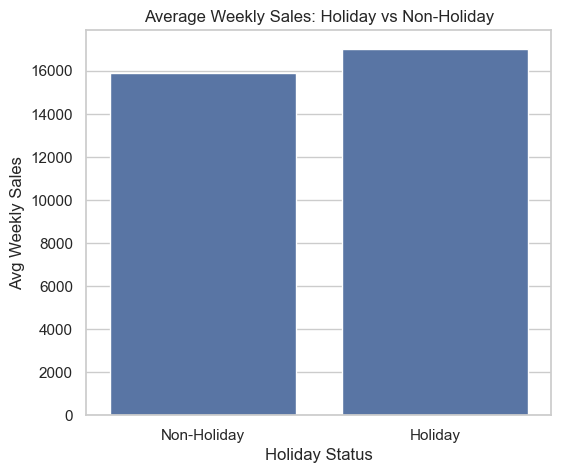

In [148]:
# Cell 9: Holiday vs Non-Holiday sales
holiday_sales = df.groupby('IsHoliday_x')['Weekly_Sales'].mean().reset_index()
holiday_sales['IsHoliday_x'] = holiday_sales['IsHoliday_x'].map({True: 'Holiday', False: 'Non-Holiday'})

plt.figure(figsize=(6, 5))
sns.barplot(data=holiday_sales, x='IsHoliday_x', y='Weekly_Sales')
plt.title("Average Weekly Sales: Holiday vs Non-Holiday")
plt.ylabel("Avg Weekly Sales")
plt.xlabel("Holiday Status")
plt.show()

We can see that avg. sales on a holiday is slightly higher than the avg. sales of a working day

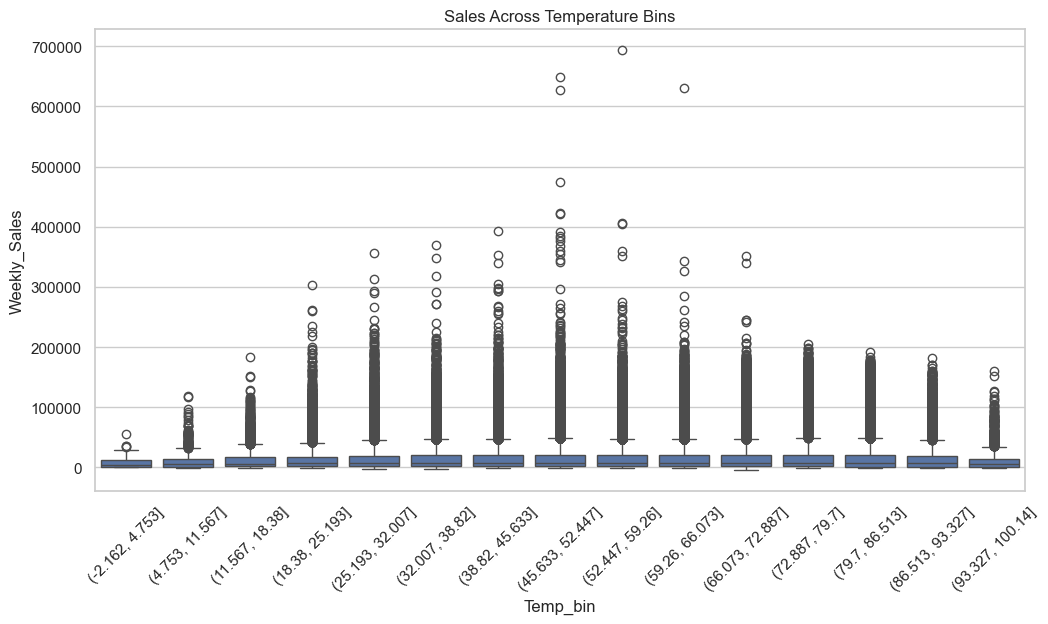

In [151]:
# Cell 10: Sales by Temperature bins
df['Temp_bin'] = pd.cut(df['Temperature'], bins=15)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Temp_bin', y='Weekly_Sales')
plt.title("Sales Across Temperature Bins")
plt.xticks(rotation=45)
plt.show()

It is more clear from the graph that prople tend to spend more when the weather is more pleasant (or moderate temperatures)
This is just a hypothesis, or could just be a coincidence, because if we look at the bigger picture, there will be different sales pattern among different products.

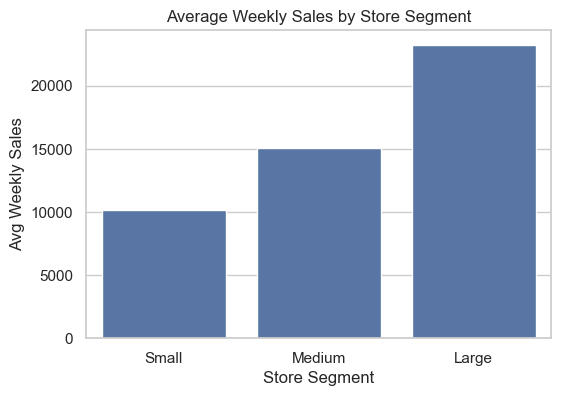

In [154]:
# Cell 11: Sales by Store Segment (based on Size)
segment_labels = ['Small', 'Medium', 'Large']
df['Segment'] = pd.qcut(df['Size'], q=3, labels=segment_labels)

segment_summary = df.groupby('Segment')['Weekly_Sales'].mean().reset_index()
plt.figure(figsize=(6, 4))
sns.barplot(data=segment_summary, x='Segment', y='Weekly_Sales')
plt.title("Average Weekly Sales by Store Segment")
plt.ylabel("Avg Weekly Sales")
plt.xlabel("Store Segment")
plt.show()

The above graph is very self explanatory that the Large Stores has more sales than Small or Medium Stores